In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline

# Моделювання падіння тіла з урахуванням опору середовища

## Task 1.1 Падіння "безпарашутиста"

In [2]:
def system(z, t, k1, k2, m, g):
    h = z[0]
    v = z[1]
    
    dhdt = v
    dvdt = (m*g - k1*v - k2*v**2)/m
    
    return [dhdt, dvdt]

In [3]:
m = 73                    # Маса парашутиста
height = 1.78             # Зріст парашутиста
chg = 0.41                # Напівобхват грудної клітини
p = 1.29                  # Густина повітря
C1 = 1.22                 # Коефіцієнт лобового опору парашутиста
C2 = 1.33                 # Коефіцієнт лобового опору парашута (напівсфери)
g = 9.81                  # Прискорення вільного падіння
mu = 0.0182               # Динамічна в'язкість повітря
R = 2.4                   # Радіус парашута (напівсфери)

S1 = height*chg           # Площа парашутиста
S2 = 2*np.pi*R**2         # Площа парашута

k1 = 6*np.pi*mu*chg       # Коефіцієнт лінійної складової швидкості
k2 = 0.5*C1*S1*p          # Коефіцієнт квадратичної складової швидкості
k1_2 = 6*np.pi*mu*R       # Коефіцієнт лінійної складової швидкості (з парашутом)
k2_2 = 0.5*C2*S2*p        # Коефіцієнт квадратичної складової швидкості (з парашутом)

z0 = [0, 0]
t1 = np.linspace(0, 20, 10000)
z1 = odeint(system, z0, t1, args=(k1, k2, m, g))

h1 = z1[:,0]
v1 = z1[:,1]

In [4]:
i = 1
while np.abs(v1[i] - v1[i-1]) > 0.0001:
    i += 1
i -= 1

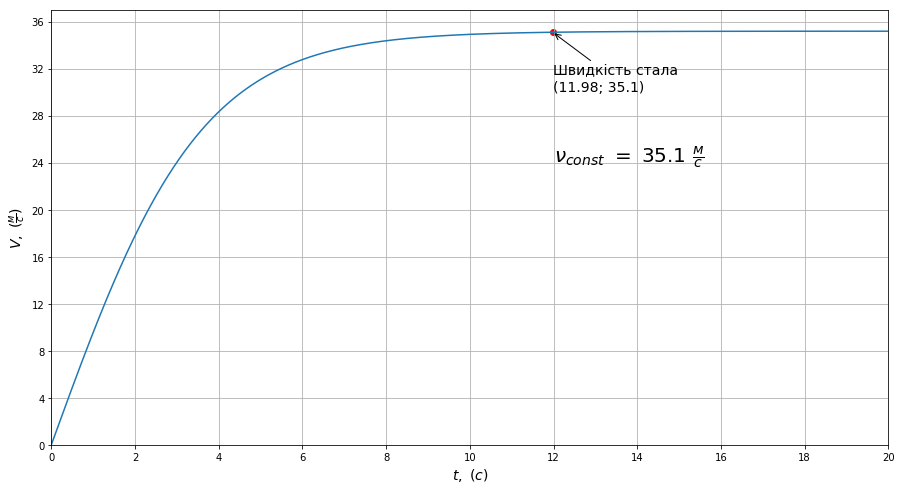

In [5]:
plt.figure(figsize=(15,8))
plt.xticks(range(0, 21, 2))
plt.yticks(range(0, 37, 4))
plt.plot(t1, v1)
plt.scatter(t1[i], v1[i], c='r')
plt.grid(True)
plt.annotate('Швидкість стала\n('+str(t1[i].round(2))+'; '+str(v1[i].round(2))+')',
             fontsize=14, xy=(t1[i], v1[i]),
             xytext=(t1[i], v1[i]-5), arrowprops=dict(arrowstyle='->'))
plt.axis([0, 20, 0, 37])
plt.text(12, 24, r'$\nu_{const}\ =\ $'+str(v1[i].round(2))+r'$\ \frac{м}{c}$', fontsize=20)
plt.ylabel(r'$V,\ (\frac{м}{c})$', fontsize=14)
plt.xlabel(r'$t,\ (c)$', fontsize=14)
plt.show()

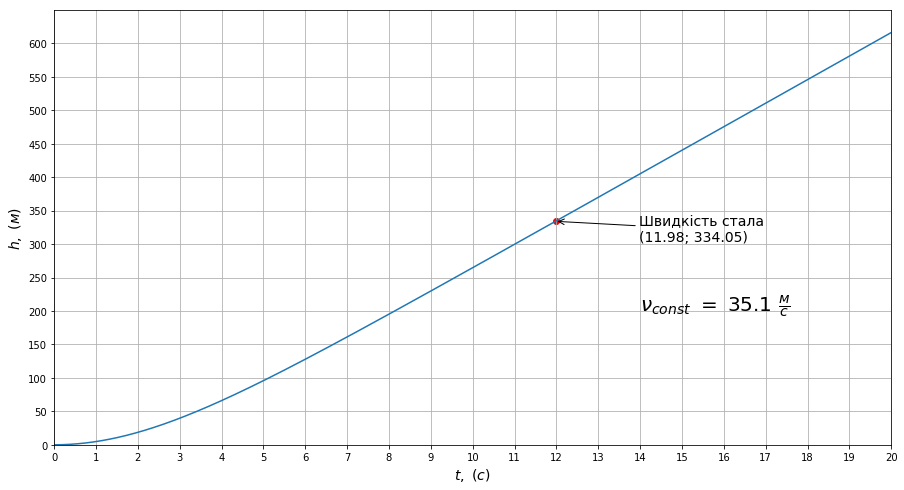

In [6]:
plt.figure(figsize=(15,8))
plt.xticks(range(0, 21, 1))
plt.yticks(range(0, 650, 50))
plt.plot(t1, h1)
plt.scatter(t1[i], h1[i], c='r')
plt.grid(True)
plt.annotate('Швидкість стала\n('+str(t1[i].round(2))+'; '+str(h1[i].round(2))+')',
             fontsize=14, xy=(t1[i], h1[i]),
             xytext=(t1[i]+2, h1[i]-30), arrowprops=dict(arrowstyle='->'))
plt.axis([0, 20, 0, 650])
plt.text(14, 200, r'$\nu_{const}\ =\ $'+str(v1[i].round(2))+r'$\ \frac{м}{c}$', fontsize=20)
plt.ylabel(r'$h,\ (м)$', fontsize=14)
plt.xlabel(r'$t,\ (c)$', fontsize=14)
plt.show()

## Task 1.2 Падіння з парашутом

In [7]:
z0 = [0, np.max(v1[i])]
t2 = np.linspace(0, 4, 4000)
z2 = odeint(system, z0, t2, args=(k1+k1_2, k2+k2_2, m, g))

h2 = z2[:,0]
v2 = z2[:,1]

In [8]:
i = 1
while np.abs(v2[i] - v2[i-1]) > 0.0001:
    i += 1
i -= 1

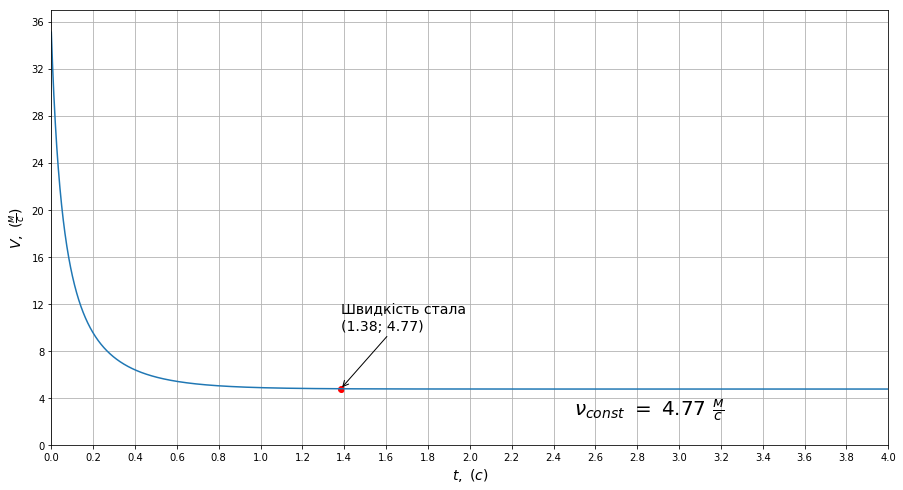

In [9]:
plt.figure(figsize=(15,8))
plt.xticks(np.linspace(0, 4, 21))
plt.yticks(range(0, 37, 4))
plt.plot(t2, v2)
plt.scatter(t2[i], v2[i], c='r')
plt.grid(True)
plt.annotate('Швидкість стала\n('+str(t2[i].round(2))+'; '+str(v2[i].round(2))+')',
             fontsize=14, xy=(t2[i], v2[i]),
             xytext=(t2[i], v2[i]+5), arrowprops=dict(arrowstyle='->'))
plt.axis([0, 4, 0, 37])
plt.text(2.5, 2.5, r'$\nu_{const}\ =\ $'+str(v2[i].round(2))+r'$\ \frac{м}{c}$', fontsize=20)
plt.ylabel(r'$V,\ (\frac{м}{c})$', fontsize=14)
plt.xlabel(r'$t,\ (c)$', fontsize=14)
plt.show()

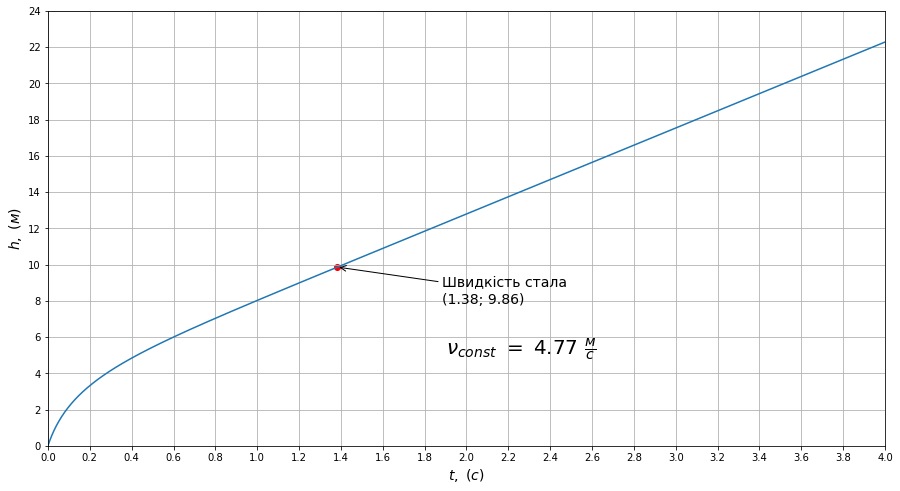

In [10]:
plt.figure(figsize=(15,8))
plt.xticks(np.linspace(0, 4, 21))
plt.yticks(range(0, 25, 2))
plt.plot(t2, h2)
plt.scatter(t2[i], h2[i], c='r')
plt.grid(True)
plt.annotate('Швидкість стала\n('+str(t2[i].round(2))+'; '+str(h2[i].round(2))+')',
             fontsize=14, xy=(t2[i], h2[i]),
             xytext=(t2[i]+0.5, h2[i]-2), arrowprops=dict(arrowstyle='->'))
plt.axis([0, 4, 0, 24])
plt.text(1.9, 5, r'$\nu_{const}\ =\ $'+str(v2[i].round(2))+r'$\ \frac{м}{c}$', fontsize=20)
plt.ylabel(r'$h,\ (м)$', fontsize=14)
plt.xlabel(r'$t,\ (c)$', fontsize=14)
plt.show()

## Task 2 Падіння кулі у в'язкому середовищі

In [11]:
def system2(z, t, k1, m, F_grav, F_a):
    h = z[0]
    v = z[1]
    
    dhdt = v
    dvdt = (F_grav - F_a - k1*v)/m
    
    return [dhdt, dvdt]

In [12]:
R = 0.2                         # Радіус кульки
p_gl = 1260                     # Густина гліцерину  
p_tin = 7300                    # Густина олова
g = 9.81                        # Прискорення вільного падіння
m = 4/3*np.pi*R**3*p_tin        # Маса кульки
mu_gl = 1480                    # Динамічна в'язкість гліцерину

F_grav = m*g                    # Сила тяжіння
F_a = 4/3*np.pi*R**3*p_gl*g     # Сила Архімеда
k1 = 6*np.pi*mu_gl*R            # Коефіцієнт лінійної складової швидкості

z0 = [0, 0]
t3 = np.linspace(0, 0.5, 500)

z3 = odeint(system2, z0, t3, args=(k1, m, F_grav, F_a))

h3 = z3[:,0]
v3 = z3[:,1]

In [13]:
i = 1
while np.abs(v3[i] - v3[i-1]) > 0.00001:
    i += 1
i -= 1

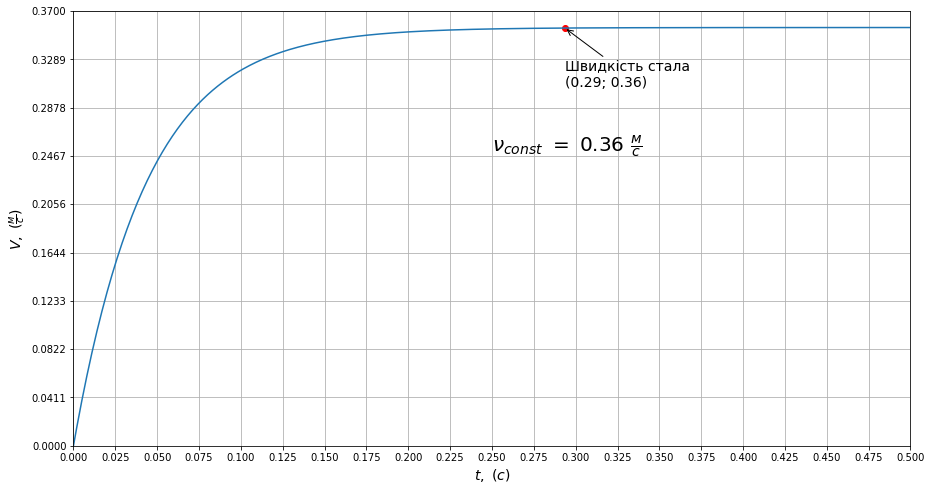

In [14]:
plt.figure(figsize=(15,8))
plt.xticks(np.linspace(0, 0.5, 21))
plt.yticks(np.linspace(0, 0.37, 10))
plt.annotate('Швидкість стала\n('+str(t3[i].round(2))+'; '+str(v3[i].round(2))+')',
             fontsize=14, xy=(t3[i], v3[i]),
             xytext=(t3[i], v3[i]-0.05), arrowprops=dict(arrowstyle='->'))
plt.axis([0, 0.5, 0, 0.37])
plt.text(0.25, 0.25, r'$\nu_{const}\ =\ $'+str(v3[i].round(2))+r'$\ \frac{м}{c}$', fontsize=20)
plt.plot(t3, v3)
plt.scatter(t3[i], v3[i], c='r')
plt.grid(True)
plt.ylabel(r'$V,\ (\frac{м}{c})$', fontsize=14)
plt.xlabel(r'$t,\ (c)$', fontsize=14)
plt.show()

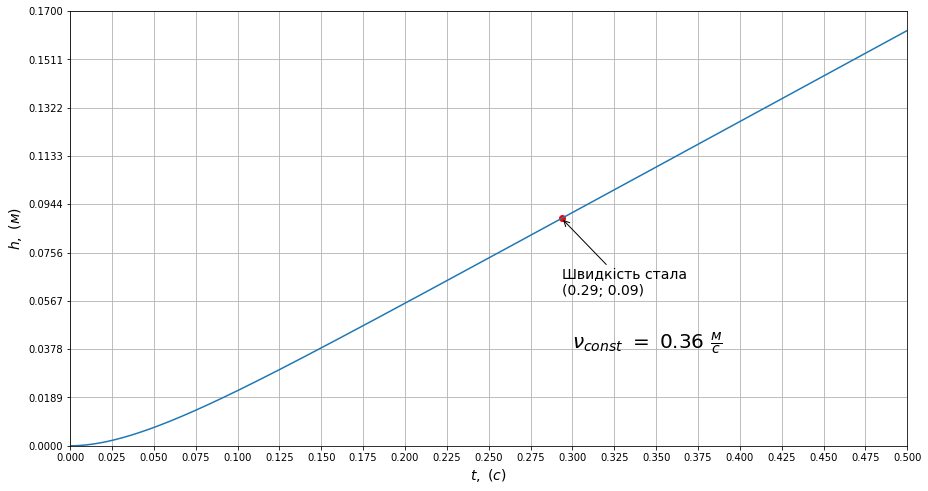

In [15]:
plt.figure(figsize=(15,8))
plt.xticks(np.linspace(0, 0.5, 21))
plt.yticks(np.linspace(0, 0.17, 10))
plt.annotate('Швидкість стала\n('+str(t3[i].round(2))+'; '+str(h3[i].round(2))+')',
             fontsize=14, xy=(t3[i], h3[i]),
             xytext=(t3[i], h3[i]-0.03), arrowprops=dict(arrowstyle='->'))
plt.axis([0, 0.5, 0, 0.17])
plt.text(0.3, 0.0378, r'$\nu_{const}\ =\ $'+str(v3[i].round(2))+r'$\ \frac{м}{c}$', fontsize=20)
plt.plot(t3, h3)
plt.scatter(t3[i], h3[i], c='r')
plt.grid(True)
plt.ylabel(r'$h,\ (м)$', fontsize=14)
plt.xlabel(r'$t,\ (c)$', fontsize=14)
plt.show()